In [1]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import seaborn as sns

In [10]:
data = pd.read_csv("C:/Users/Dell/Desktop/Assignments/Clustering/crime_data.csv")

In [11]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [14]:
data1 = data.rename(columns={'Unnamed: 0':'State'})
data1.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [16]:
#Defining the Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [18]:
#Performing normalization only on the numerical data
df_normal = norm_func(data1.iloc[:,1:])

In [20]:
df_normal.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


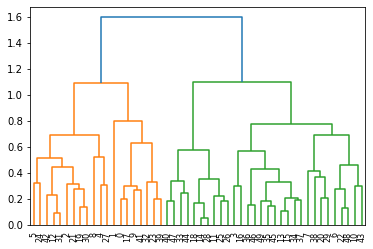

In [19]:
#Dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_normal, method='complete'))

In [22]:
#Creating the cluster algorithm that can be later mapped onto the dataset
hc = AgglomerativeClustering(n_clusters=4, affinity='euclidean',linkage='single')
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [24]:
#Fitting the algorithm on the current dataset that will give us the cluster labels
y_hc = hc.fit_predict(df_normal)
Clusters = pd.DataFrame(y_hc, columns=['Clusters'])

In [31]:
Clusters

,Clusters
0,0
1,3
2,0
3,0
4,0
5,0
6,0
7,1
8,2
9,0


In [26]:
data1['Cluster_ID']=Clusters

In [29]:
data1.head()

,State,Murder,Assault,UrbanPop,Rape,Cluster_ID
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,0


In [35]:
data1.groupby('Cluster_ID').agg(['mean']).reset_index()

,Cluster_ID,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,7.619149,163.87234,65.468085,20.625532
1,1,5.900000,238.00000,72.000000,15.800000
2,2,15.400000,335.00000,80.000000,31.900000
3,3,10.000000,263.00000,48.000000,44.500000


In [36]:
data1.groupby('Cluster_ID').agg(['count']).reset_index()

,Cluster_ID,State,Murder,Assault,UrbanPop,Rape
,,count,count,count,count,count
0,0,47,47,47,47,47
1,1,1,1,1,1,1
2,2,1,1,1,1,1
3,3,1,1,1,1,1


# Inferences:
* Most datapoints fall under the same cluster, i.e, Cluster 0
* The algorithm isn't really helpful/useful when most data gets categorized under the same cluster